In [1]:
from cassie import CassieEnv
import functions as f
import constants as c
import loader as l 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cassie = CassieEnv({})
cassie.reset()


(array([ 0.40529365,  0.50114256,  0.38576068,  0.87909162,  1.27494147,
         0.49989682, -0.40814964,  1.27277156,  0.60190537,  0.49535994,
         0.38459934,  1.1916409 ,  1.27321693,  0.50008434, -0.40818156,
         1.27273707,  0.5001423 ,  0.50000375,  0.49990505,  0.99993205,
         0.0050422 ,  0.00951489,  0.00446504,  0.        ,  1.        ]),
 {})

In [3]:
cassie.render_mode = "rgb_array"

In [15]:
#simulate cassie for some steps doing nothing and plot the metrics inside 
rendered_frames = []
used_quantities = []
cassie.reset()
for _ in range(100):
    obs, _, _, _,_ = cassie.step(np.zeros(10))
    rendered_frame = cassie.render()
    rendered_frames.append(rendered_frame)
    for i in range (len(obs)):
        cassie.used_quantities["ob_"+str(i)] = obs[i]
    used_quantities.append(cassie.used_quantities)

# convert list of dictionaries to dictionary of lists
used_quantities = {k: [d[k] for d in used_quantities] for k in used_quantities[0]}





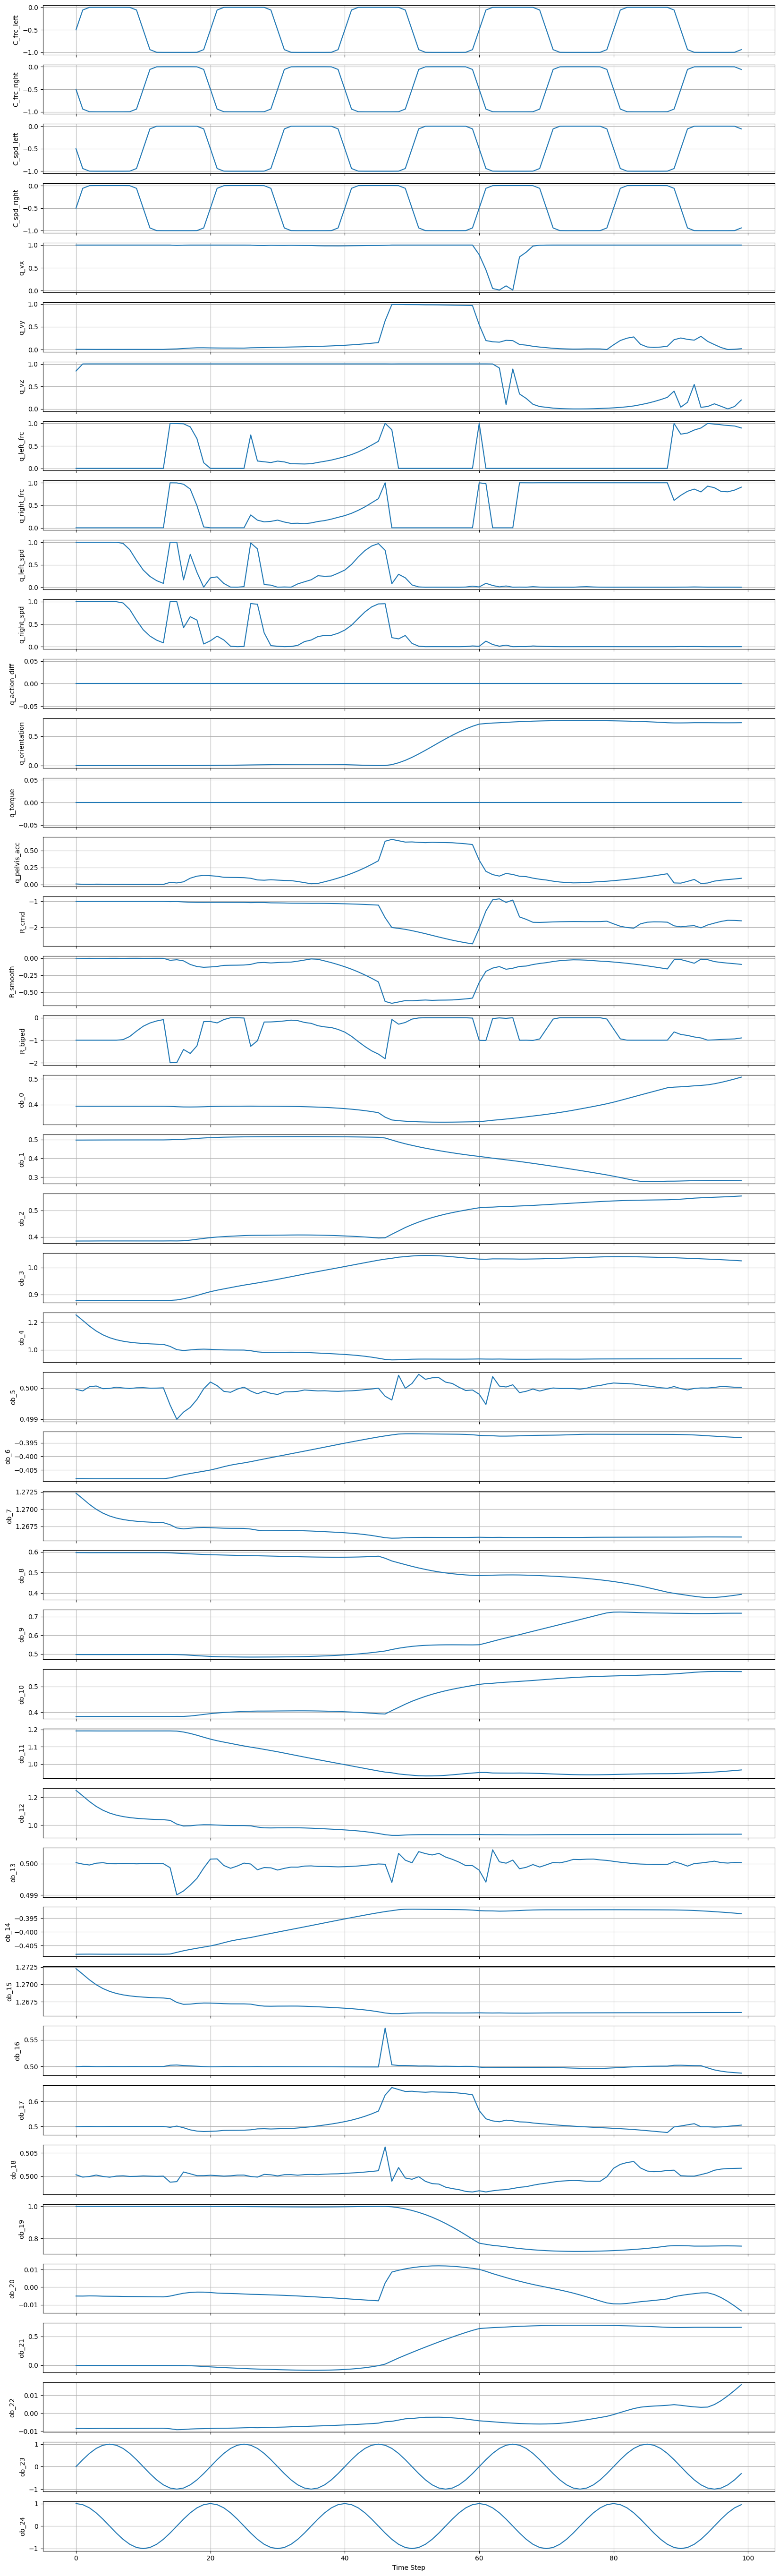

In [16]:
# plot the metrics and use the exact number on the x axis
fig, axs = plt.subplots(len(used_quantities), 1, figsize=(20, 70), sharex=True)
for i, key in enumerate(used_quantities):
    axs[i].plot(used_quantities[key])
    axs[i].set_ylabel(key)
    axs[i].grid(True)
plt.xlabel("Time Step")
plt.show()



In [51]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

def plot_cassie(rendered_frames, used_quantities,plot_keys):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    fig.subplots_adjust(bottom=0.2)

    # plot the first frame
    im = ax1.imshow(rendered_frames[0])
    ax1.axis('off')

    # plot the metrics
    lines = {}
    for key in plot_keys:
        value = used_quantities[key]
        #display the legend 

        line,= ax2.plot(value[:1], label=key)

        lines[key] = line
    ax2.set_xlabel('Frame')
    ax2.set_ylabel('Value')
    ax2.legend()
    # create the slider
    slider = widgets.IntSlider(min=0, max=len(rendered_frames)-1, step=1, value=0)

    # create an output widget to display the plot
    out = widgets.Output()

    # function to update the plot when the slider is moved
    def update_plot(frame):
        im.set_data(rendered_frames[frame])
        for key, line in lines.items():
            line.set_data(range(frame+1), used_quantities[key][:frame+1])
        ax2.relim()
        ax2.autoscale_view()
        with out:
            out.clear_output(wait=True)
            display(fig)

    slider.observe(lambda event: update_plot(event['new']), names='value')

    return widgets.VBox([out, slider])


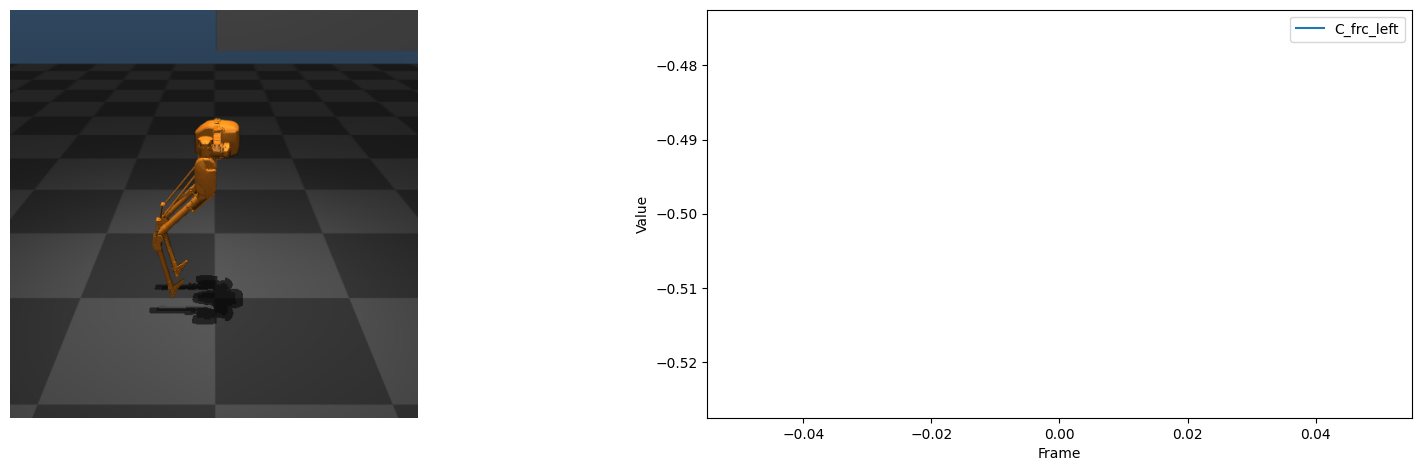

In [54]:
#plot the cassie simulation
plot_cassie(rendered_frames, used_quantities,["C_frc_left"])

In [69]:
#load the yaml file GeneralConfig.yaml as a dictionary
config = l.Loader("logs","sims").load_config("GeneralConfig.yaml")
print(config.keys())
trainingConfig = config["training"]
environmentConfig = config["environment"]
frameworkConfig = config["framework"]
debuggingConfig = config["debugging"]
callbacksConfig = config["callbacks"]
resourcesConfig = config["resources"]
rolloutsConfig = config["rollouts"]
checkpointingConfig = config["checkpointing"]
evalutationConfig = config["evaluation"]


{'training': {'gamma': 0.99, 'lr': 0.001, 'train_batch_size': 50000, 'model': {'fcnet_hiddens': [256, 256], 'fcnet_activation': 'swish', 'vf_share_layers': False, 'free_log_std': True}, 'optimizer': {'type': 'adam', 'eps': '1e-08'}, 'lr_schedule': None, 'use_critic': True, 'use_gae': True, 'lambda_': 0.95, 'kl_coeff': 0.2, 'sgd_minibatch_size': 9000, 'num_sgd_iter': 6, 'shuffle_sequences': True, 'vf_loss_coeff': 0.5, 'entropy_coeff': 0.01, 'entropy_coeff_schedule': None, 'clip_param': 0.2, 'vf_clip_param': None, 'grad_clip': None, 'kl_target': 0.01, 'max_requests_in_flight_per_sampler_worker': None, '_enable_rl_trainer_api': None}, 'environment': {'env': 'cassie-v0', 'env_config': {}, 'observation_space': None, 'action_space': None, 'env_task_fn': None, 'render_env': None, 'clip_rewards': None, 'normalize_actions': True, 'clip_actions': True, 'disable_env_checking': True, 'is_atari': False, 'auto_wrap_old_gym_envs': None}, 'framework': {'framework': 'torch', 'eager_tracing': True, 'eag

In [70]:
frameworkConfig

{'framework': 'torch',
 'eager_tracing': True,
 'eager_max_retraces': None,
 'tf_session_args': {'gpu_options': {'allow_growth': None},
  'allow_soft_placement': None},
 'local_tf_session_args': {'intra_op_parallelism_threads': None,
  'inter_op_parallelism_threads': None}}

In [71]:
from ray.rllib.algorithms.ppo import PPOConfig

trainer = PPOConfig().training(**trainingConfig).environment(**environmentConfig).framework(**frameworkConfig).debugging(**debuggingConfig).callbacks(**callbacksConfig).resources(**resourcesConfig).rollouts(**rolloutsConfig).checkpointing(**checkpointingConfig).evaluation(**evalutationConfig).build()

TypeError: '>' not supported between instances of 'NoneType' and 'int'